<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Occupancy Estimation</strong></h2>

### <b>Group Number</b>
### <b>Student Name: Tran Khai Minh (s3818343)</b>
### <b>Student Name: Tran Khai Minh (s3818343)</b>
### <b>Student Name: Tran Khai Minh (s3818343)</b>
### <b>Student Name: Tran Khai Minh (s3818343)</b>


### <b>Course: EEET2485 - Research Method for Engineers</b>
### <b>Lecturer: Someone</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop duplicate](#2.2)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Outliers](#3.1)

> - 3.1.1 [Descriptive statistics for Central Tendency](#3.1.1) 
> - 3.1.2 [Detecting and Dealing with outliers](#3.1.2) 

3.2 [Correlation between columns](#3.2)

> - 3.2.1 [Correlation of the temperature sensors](#3.2.1) 
> - 3.2.2 [Correlation of the light sensors](#3.2.2) 
> - 3.2.3 [Correlation of the sound sensors](#3.2.3) 
> - 3.2.4 [Correlation of the CO2 sensors](#3.2.4) 
> - 3.2.5 [Multicorrelational problem](#3.2.5) 

3.3 [Analyse Room Occupation causation](#3.3)

> - 3.3.1 [Bartlett’s test](#3.3.1) 
> - 3.3.2 [Choosing the Number of Factors](#3.3.2) 

3.4 [Analyse Room Occupation in different condition](#3.4)

> - 3.4.1 [EDA the main factors (`S1_Light` and `S5_CO2` with the `Room_Occupancy_Count`)](#3.4.1) 
> - 3.4.2 [Statistical Test](#3.4.2) 

<br>

### 4. [Reference](#4)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The world population has shown a considerable upward trend recently, so that the buying and selling an occupation has received a great academic attention. In this project, we have conducted research on a provided dataset which is about the “Room Occupancy Estimation” by Adarsh Pal Singh and Dr. Sachin Chaudhari.  We examined machine behavior pattern in numerous aspects using approaches and analytical tools provided in Pandas, including factor collaborations, data probability distributions, and room occupancy causes. Based on the defined aspects, we develop a list of research questions to investigate the nature of our dataset based on the mentioned features.</p>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
## A.	Analyze correlations between each parameter:
> -	***Correlation between User Feature***:
>> - What is the correlation between `CasualUser` and `RegisteredUser`?
>> - What is the correlation between `Newregistereduser` and `RegisteredUser`?
>> - What is the correlation between `Newregistereduser` and `CasualUser`?

> -	***Correlation between Temperature Feature***:
>> - What is the correlation between `Dewpointtemperature(°C)` and `Temperature(°C)`?
>> - What is the correlation between `Humidity(%)` and `Temperature(°C)`?
>> - What is the correlation between `Humidity(%)` and `Dewpointtemperature(°C)`?
>> - What is the correlation between `SolarRadiation(MJ/m2)` and `Temperature(°C)`?
>> - What is the correlation between `SolarRadiation(MJ/m2)` and `Humidity(%)`?
>> - What is the correlation between `SolarRadiation(MJ/m2)` and `Dewpointtemperature(°C)`?

> -	***Correlation between OperationDay with other features***:
>> - What is the correlation between `OperationDay` and `CasualUser`?
>> - What is the correlation between `OperationDay` and `Temperature(°C)`?
>> - What is the correlation between `OperationDay` and `Humidity`?
>> - What is the correlation between `OperationDay` and `Windspeed`?
>> - What is the correlation between `OperationDay` and `Visibility`?
>> - What is the correlation between `OperationDay` and `Dewpointtemperature`?
>> - What is the correlation between `OperationDay` and `SolarRadiation`?
>> - What is the correlation between `OperationDay` and `Rainfall`?
>> - What is the correlation between `OperationDay` and `Snowfall`?
>> - What is the correlation between `OperationDay` and `Seasons`?



## B.	Analyze Operation Day condition:
> - What is the main factor for the station to be open? 

## C.	Analyze Operation Day in different condition:
> - How the main factor influencing the `Room_Occupancy_Count`.

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install factor_analyzer
!{sys.executable} -m pip -q install pingouin
!{sys.executable} -m pip -q install researchpy

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#This is library for missing values drawing
import missingno as msno
#This library is for factor analysise
from factor_analyzer import FactorAnalyzer 
#This library is for Bartlett ’s test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#This library is for Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
#Factor analysis
import pingouin as pg
#This is is for Correlation test
from scipy.stats import pearsonr
#This is is for Mann-Whitney Testing
import scipy.stats as stats


#for plots
import matplotlib.pyplot as plt
#This is for setting the size of plots
plt.rcParams["figure.figsize"]= 20,15
from scipy import stats #This is for state model and ploting
import statsmodels.api as sm #This is for state model report


#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Check numpy and pandas version

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.4
Python 3.9.13


### ------------> OBSERVATION
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***

In [3]:
df = pd.read_excel("orca_share_media1671971258867_7012755738953777548.xlsx")

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (8760, 15)


,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,OperationDay
0,1,2017-01-12 00:00:00,80.0,254,5,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Yes
1,2,2017-01-12 00:00:00,79.0,204,6,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Yes
2,3,2017-01-12 00:00:00,81.0,173,8,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Yes


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(8760, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   StationNumber            8760 non-null   int64  
 1   Date                     8760 non-null   object 
 2   CasualUser               8760 non-null   float64
 3   RegisteredUser           8760 non-null   int64  
 4   Newregistereduser        8760 non-null   int64  
 5   Temperature(°C)          8760 non-null   float64
 6   Humidity(%)              8760 non-null   int64  
 7   Windspeed(m/s)           8760 non-null   float64
 8   Visibility(10m)          8760 non-null   int64  
 9   Dewpointtemperature(°C)  8760 non-null   float64
 10  SolarRadiation(MJ/m2)    8760 non-null   float64
 11  Rainfall(mm)             8760 non-null   float64
 12  Snowfall(cm)             8760 non-null   float64
 13  Seasons               

### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total record is 8760 with no missing and it has 15 columns with the target variable `OperationDay`.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:**    
- **Nominal** (variables that have two or more categories, but which do not have an intrinsic order.)
 >  - **Seasons**: The season of the record
 
- **Dichotomous** (Nominal variable with only two categories)
 >  - **OperationDay**: The target variable, If the station is open.


***
**Numeric:**
- **Continous**
    >  - **Temperature(°C)**: Average temperature at the station
    >  - **Humidity(%)**: Average humidity at the station
    >  - **Windspeed(m/s)**: Average wind speed at the station
    >  - **Visibility(10m)**: Average visibility at the station
    >  - **Dewpointtemperature**: Average dew point temperature at the station
    >  - **SolarRadiation(MJ/m2)**: Average solar radiation at the station
    >  - **Rainfall(mm)**: Average rainfall rate at the station
    >  - **Snowfall(cm)**: Average snowfall rate at the station
  

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, we want to drop duplicate

In [5]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(8760, 15)
The shape of the data set after dropping duplicated:(8760, 15)


### ------------> OBSERVATION
***
In our data there is no duplicated values.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data Exploration </strong></h1>

****

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [6]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StationNumber,8760.0,12.500000,6.922582,1.0,6.75,12.50,18.25,24.00
CasualUser,8760.0,279.777523,266.546813,0.0,69.00,195.00,424.00,1599.00
RegisteredUser,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Newregistereduser,8760.0,22.454566,22.155487,0.0,5.00,15.00,34.00,159.00
Temperature(°C),8760.0,12.993653,12.271382,-17.8,3.50,13.80,22.60,124.00
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Windspeed(m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility(10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dewpointtemperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
SolarRadiation(MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52


<AxesSubplot:>

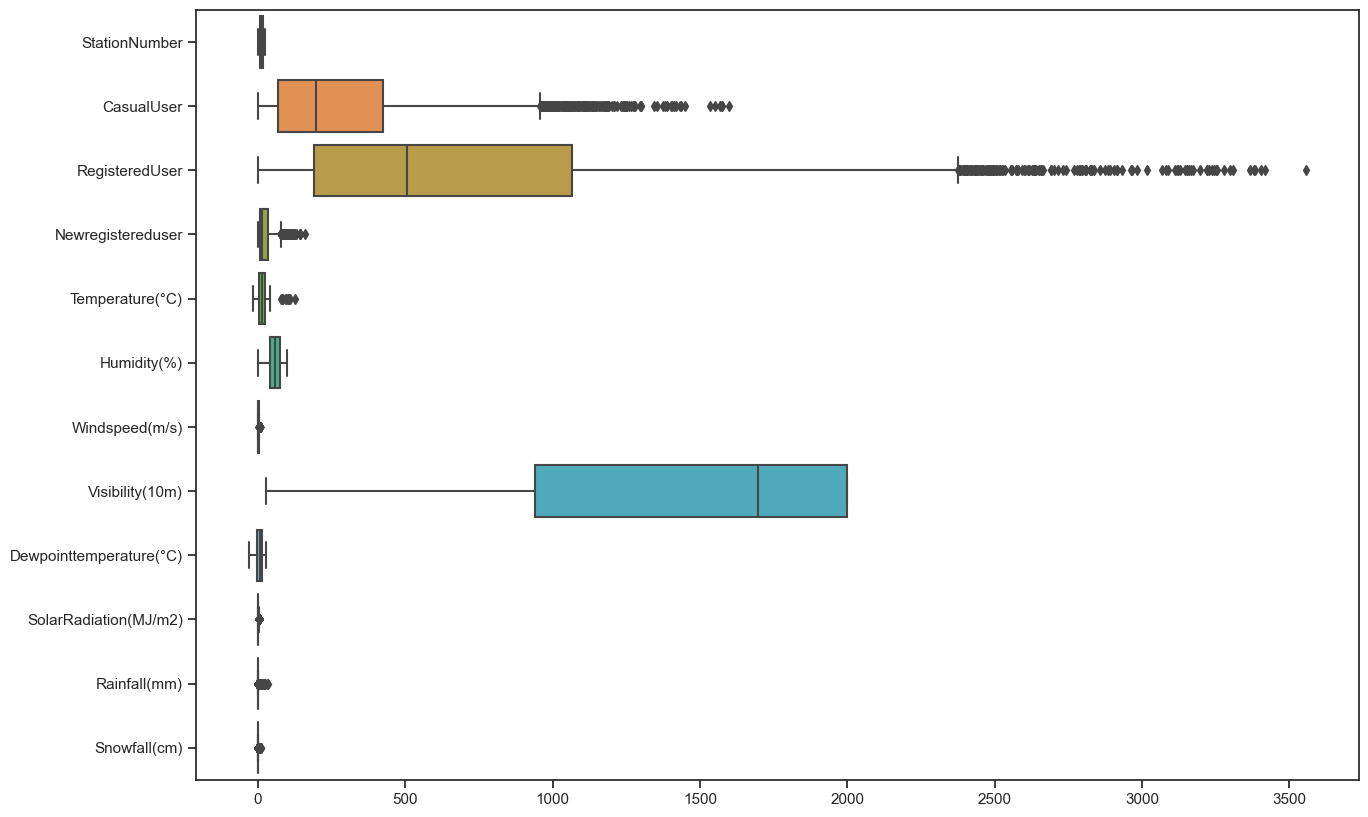

In [7]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> There are some unrealistic values in `Temperature` and `Humidity`. I want to explore it first.

# Temperature

## Interquartile Range

In [8]:
# calculate the q1 and q3 and then the iqr
q1_Temperature = df['Temperature(°C)'].quantile(.25)
q3_Temperature = df['Temperature(°C)'].quantile(.75)
iqr_Temperature = q3_Temperature - q1_Temperature

print("q1_Temperature:", q1_Temperature, "\n")
print("q3_Temperature:", q3_Temperature, "\n")
print("iqr_Temperature:", iqr_Temperature)

q1_Temperature: 3.5 

q3_Temperature: 22.6 

iqr_Temperature: 19.1


## Descriptive statistics for Variability

In [9]:
# look at the Temperature mean
Temperature_mean = df['Temperature(°C)'].mean()
print("Temperature_mean:", Temperature_mean)
# look at the Temperature median
Temperature_median = df['Temperature(°C)'].median()
print("Temperature_median:", Temperature_median)
# look at the Temperature mode
Temperature_mode = df['Temperature(°C)'].mode().values[0]
print("Temperature_mode:", Temperature_mode)

Temperature_mean: 12.99365296803654
Temperature_median: 13.8
Temperature_mode: 19.1


(0.0, 550.0)

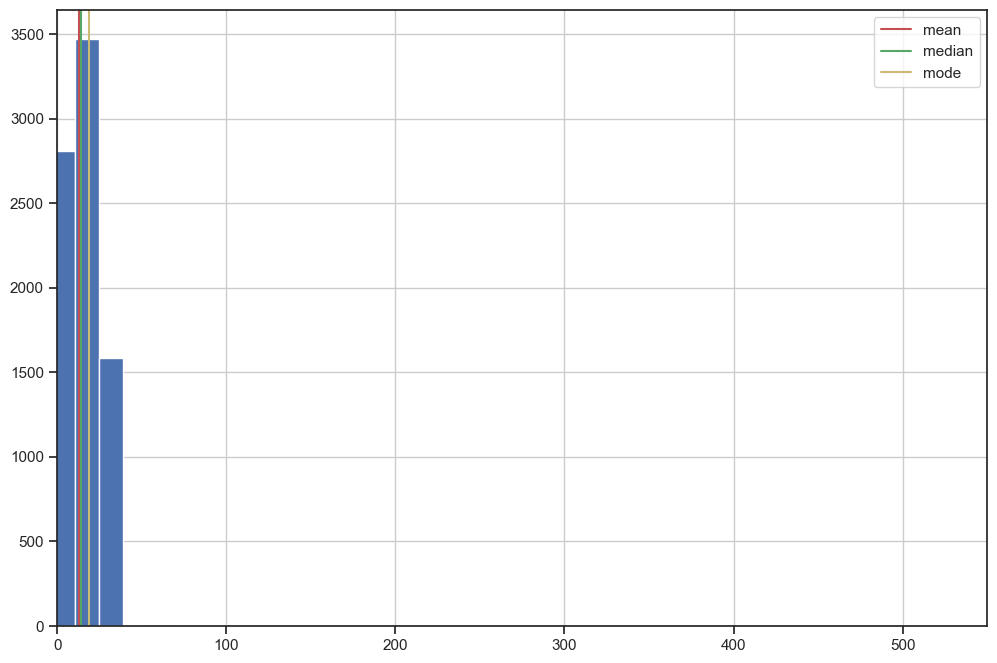

In [10]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Temperature(°C)'].hist()

plt.axvline(Temperature_mean, color='r', label='mean')
plt.axvline(Temperature_median, color='g', label='median')
plt.axvline(Temperature_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> - The mean lower than the median indicates that the data is skewed to the right.
> - Moreover, it is impossible for the `Temperature(°C)` to have the value is higher than the world highest record for Temperature [[1](#Link1)]. Therefore, there are outliers in this features.

# Humidity
*****
## Interquartile Range

In [11]:
# calculate the q1 and q3 and then the iqr
q1_Humidity = df['Humidity(%)'].quantile(.25)
q3_Humidity = df['Humidity(%)'].quantile(.75)
iqr_Humidity = q3_Humidity - q1_Humidity

print("q1_Humidity:", q1_Humidity, "\n")
print("q3_Humidity:", q3_Humidity, "\n")
print("iqr_Humidity:", iqr_Humidity)

q1_Humidity: 42.0 

q3_Humidity: 74.0 

iqr_Humidity: 32.0


In [12]:
## Descriptive statistics for Variability

In [13]:
# look at the Humidity mean
Humidity_mean = df['Humidity(%)'].mean()
print("Humidity_mean:", Humidity_mean)
# look at the Humidity median
Humidity_median = df['Humidity(%)'].median()
print("Humidity_median:", Humidity_median)
# look at the Humidity mode
Humidity_mode = df['Humidity(%)'].mode().values[0]
print("Humidity_mode:", Humidity_mode)

Humidity_mean: 58.226255707762554
Humidity_median: 57.0
Humidity_mode: 53


(0.0, 550.0)

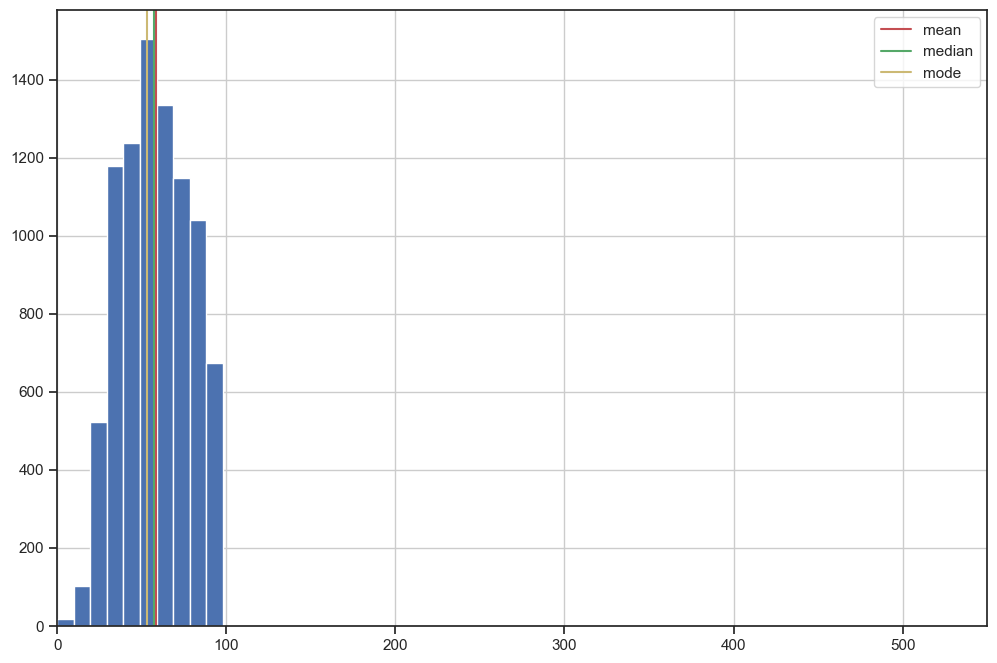

In [14]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Humidity(%)'].hist()

plt.axvline(Humidity_mean, color='r', label='mean')
plt.axvline(Humidity_median, color='g', label='median')
plt.axvline(Humidity_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
****
> - The mean larger than the median indicates that the data is skewed to the left.
> - Moreover, it is impossible for the `Humidity(%)` to have the value is higher than the world highest record for Humidity [[2](#Link2)]. Therefore, there are outliers in this features.

<a id="3.1.2"></a>
## 3.1.2 Detecting and Dealing with outliers

In [15]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`Temperature(°C)` column**

<AxesSubplot:>

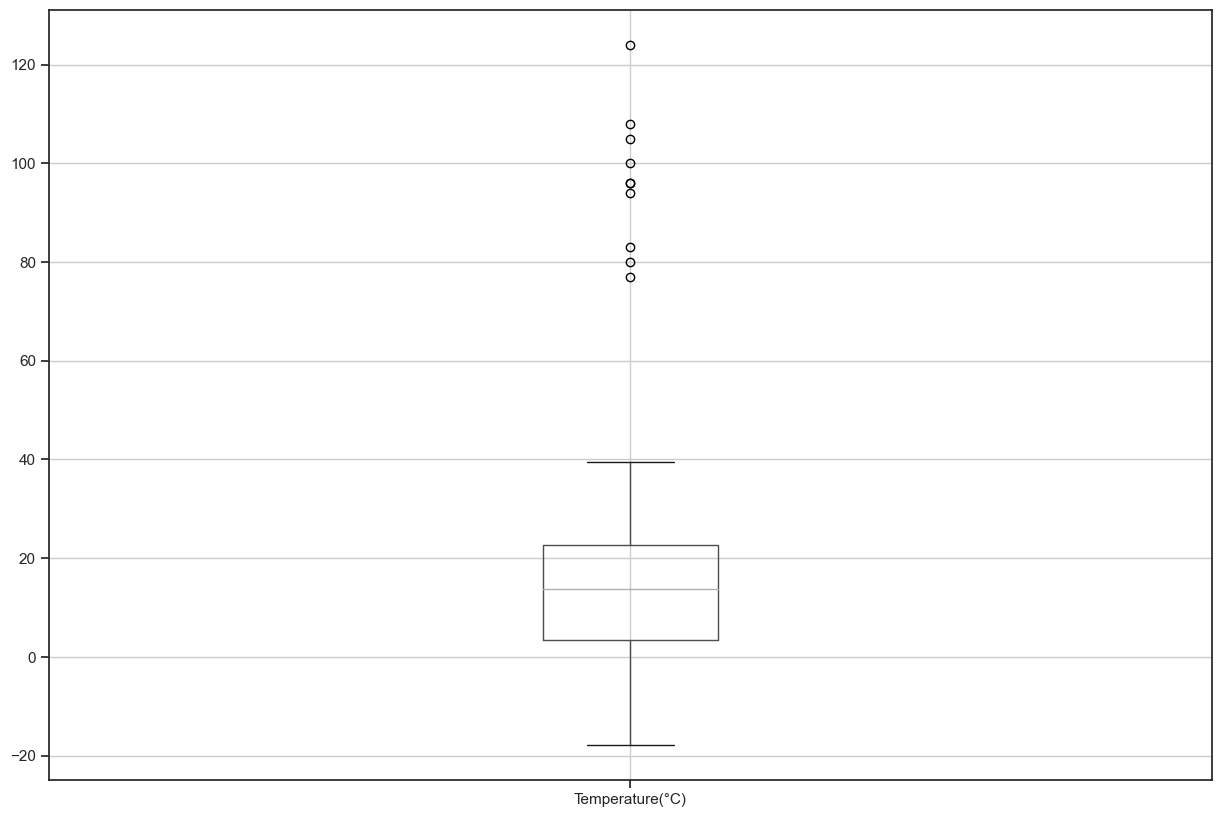

In [16]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Temperature(°C)")

In [17]:
outliers, upper, lower = detect_outliers_IQR(df['Temperature(°C)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 10
max outlier value: 124.0
min of outliers: 77.0
Percentage of outliers: 0.1141552511415525


### ---------> OBSERVATION
****
The percentage of outliers in `Temperature(°C)` is extremely small so that I want to drop them since those values of are impossible

In [18]:
df.drop(upper[0], inplace = True)

> **`Humidity(%)` column**

<AxesSubplot:>

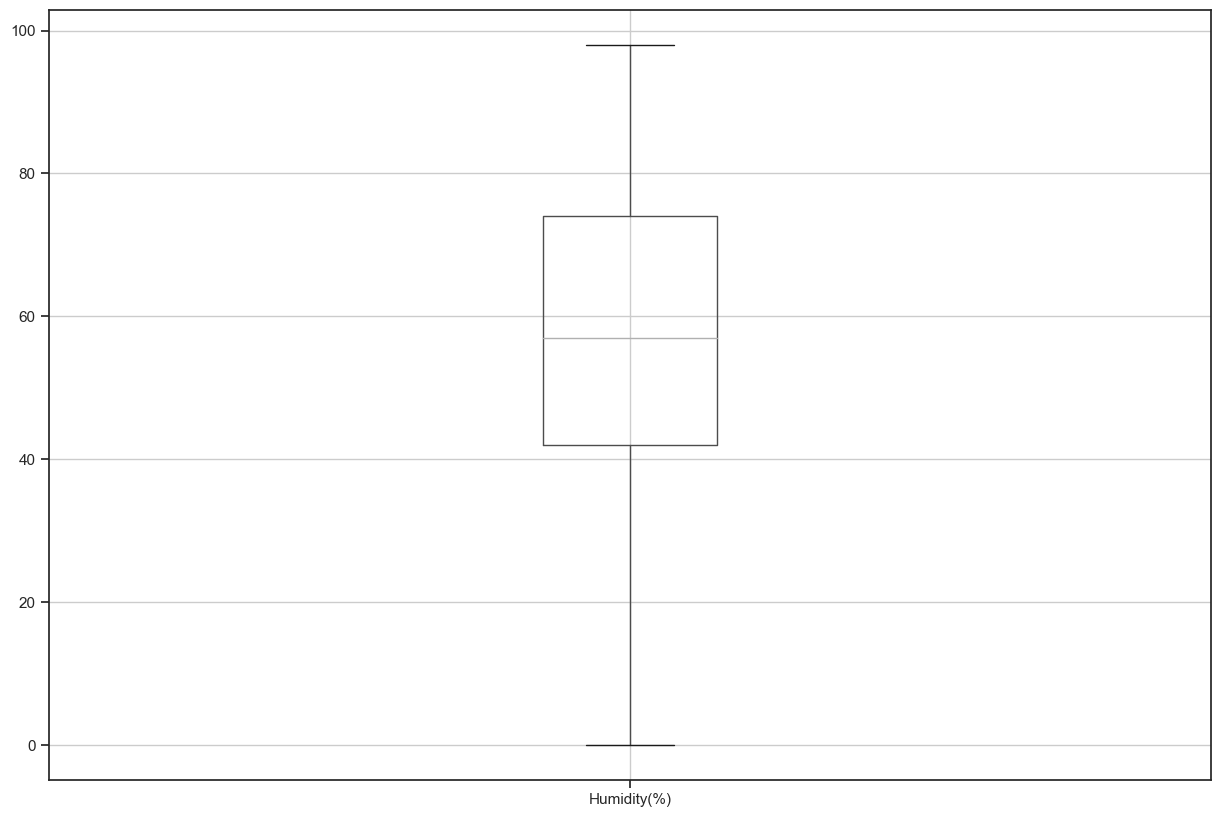

In [19]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Humidity(%)")

In [20]:
outliers, upper, lower = detect_outliers_IQR(df['Humidity(%)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
Although `Humidity` have some values that might seem to be impossible, but there is no outliers

> **`Windspeed(m/s)` column**

<AxesSubplot:>

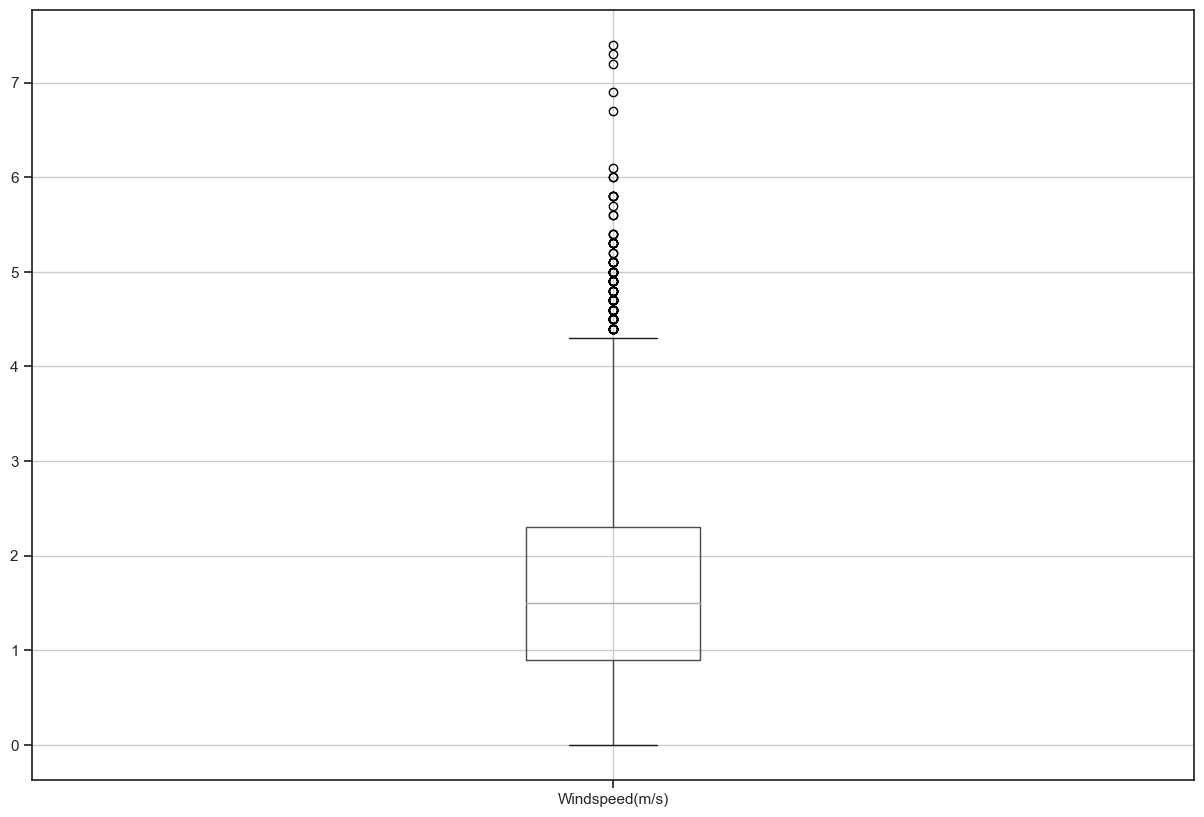

In [21]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Windspeed(m/s)")

In [22]:
outliers, upper, lower = detect_outliers_IQR(df['Windspeed(m/s)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 161
max outlier value: 7.4
min of outliers: 4.4
Percentage of outliers: 1.8399999999999999


### ---------> OBSERVATION
****
The number of outliers of `Windspeed` is extremely small, and those values seems to be acceptable so I will keep those values to gain more insight from the abnormal Wind speed.

> **`Visibility(10m)` column**

<AxesSubplot:>

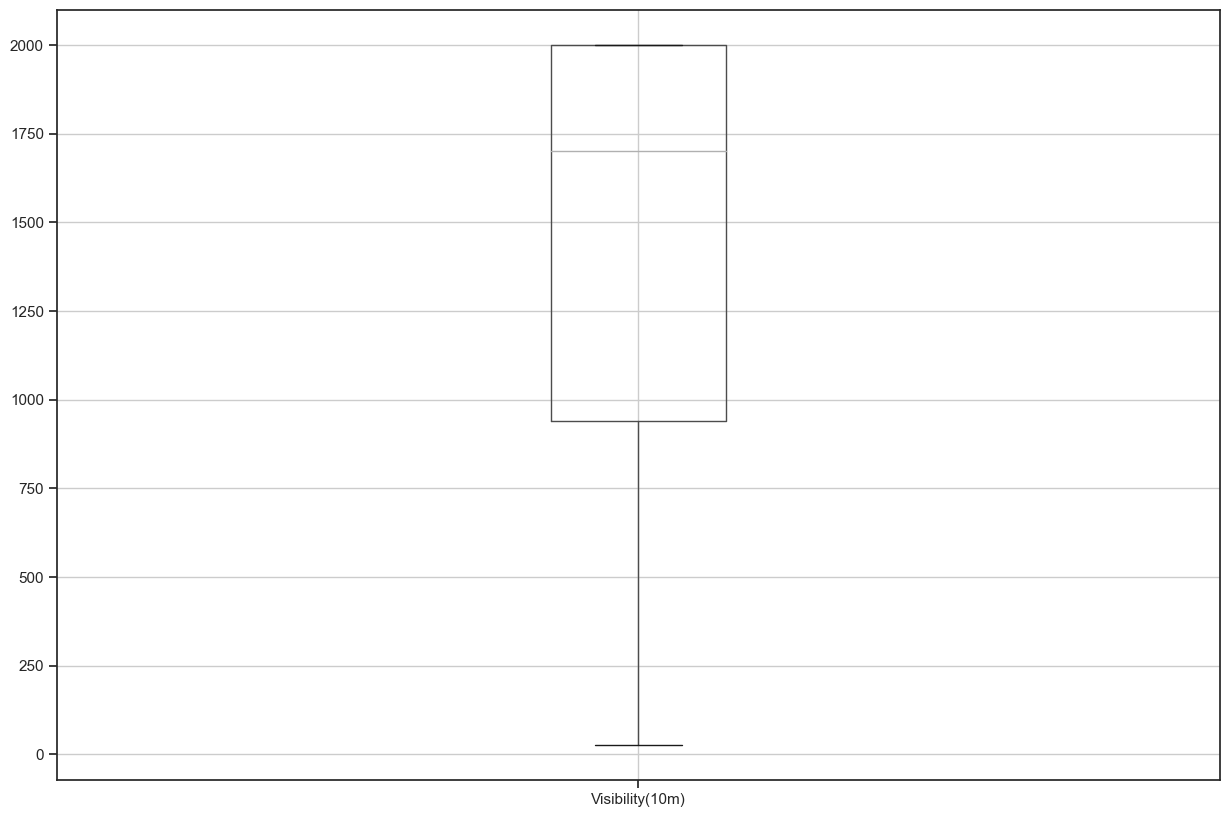

In [23]:
plt.figure(figsize= (15,10))

df.boxplot(column= "Visibility(10m)")

In [24]:
outliers, upper, lower = detect_outliers_IQR(df['Visibility(10m)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers in `Visibility`.

> **`Dewpointtemperature(°C)` column**

<AxesSubplot:>

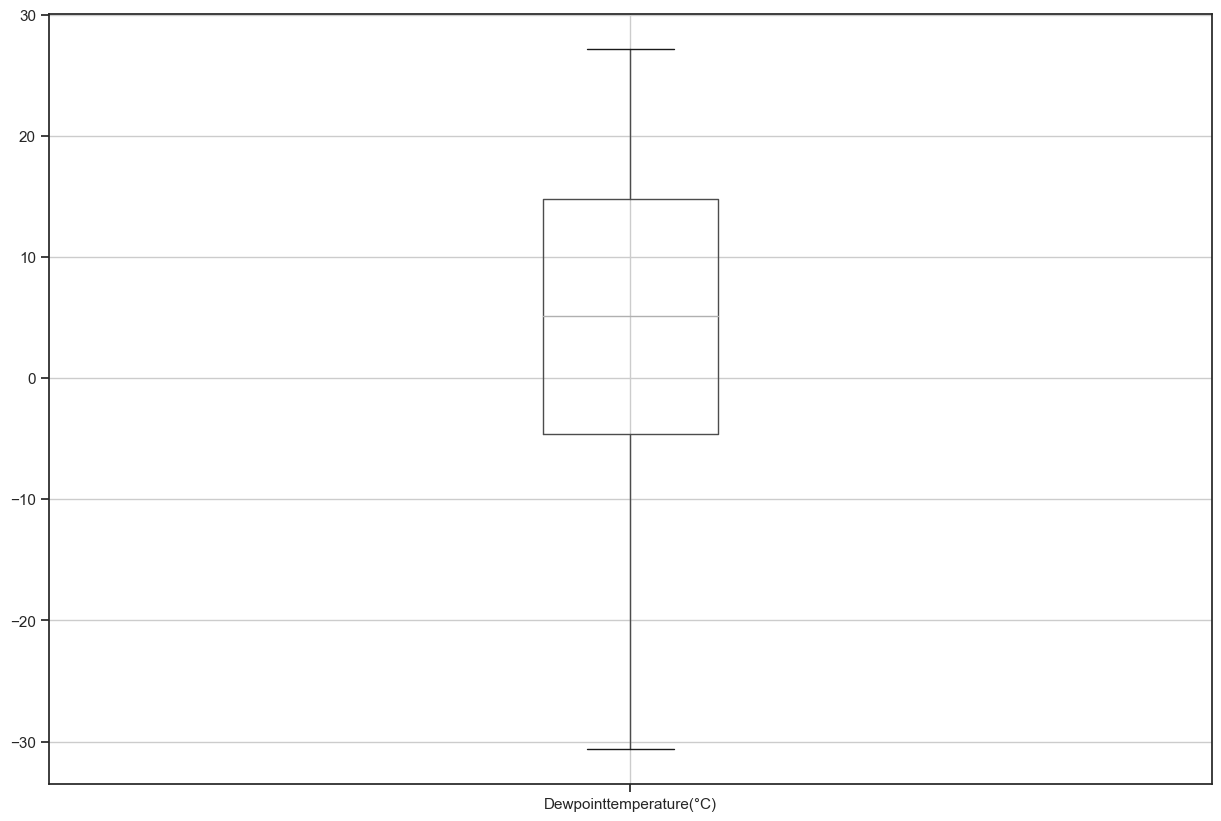

In [25]:
plt.figure(figsize= (15,10))
df.boxplot(column= "Dewpointtemperature(°C)")

In [26]:
outliers, upper, lower = detect_outliers_IQR(df['Dewpointtemperature(°C)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers in `Dewpointtemperature(°C)`

> **`SolarRadiation(MJ/m2)` column**

<AxesSubplot:>

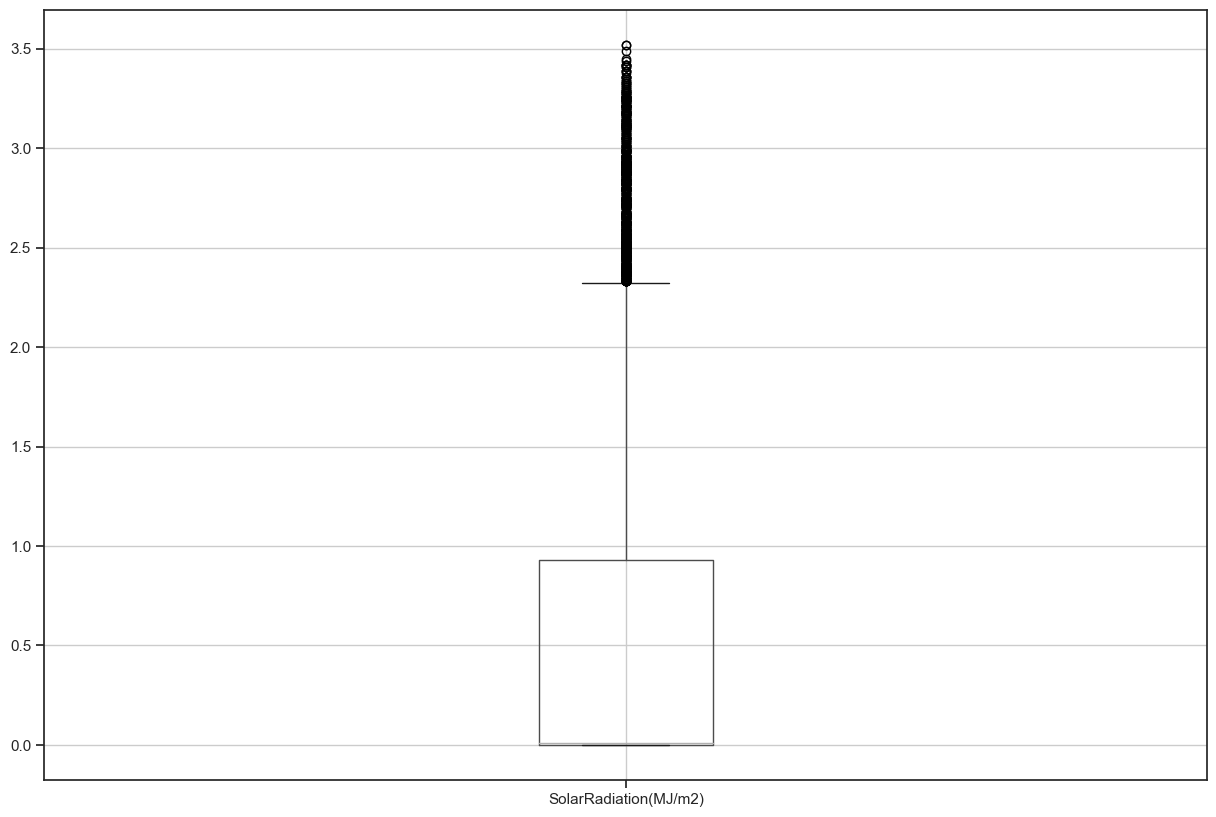

In [27]:
plt.figure(figsize= (15,10))
df.boxplot(column= "SolarRadiation(MJ/m2)")

In [28]:
outliers, upper, lower = detect_outliers_IQR(df['SolarRadiation(MJ/m2)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 641
max outlier value: 3.52
min of outliers: 2.33
Percentage of outliers: 7.325714285714286


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [29]:
extreme_SolarRadiation = df[(df['SolarRadiation(MJ/m2)'] > outliers.min()) & (df['SolarRadiation(MJ/m2)'] < outliers.max())]
extreme_SolarRadiation.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,OperationDay
1741,14,2018-11-02 00:00:00,74.0,212,5,-2.4,28,3.0,1953,-18.4,2.35,0.0,0.0,Winter,Yes
1885,14,17/02/2018,90.0,193,8,-0.4,15,2.4,1938,-23.9,2.46,0.0,0.0,Winter,Yes
1886,15,17/02/2018,100.0,258,10,-0.1,15,4.0,2000,-23.7,2.39,0.0,0.0,Winter,Yes
1982,15,21/02/2018,178.0,365,17,3.3,14,2.9,1985,-21.7,2.49,0.0,0.0,Winter,Yes
2054,15,24/02/2018,160.0,454,14,6.9,19,1.9,1843,-15.1,2.36,0.0,0.0,Winter,Yes


### ---------> OBSERVATION
****
Based on the result, I see the outlier of `SolarRadiation` is often located in the extreme condition of environment so I want to explore more them in the next step.

> **`Rainfall(mm)` column**

<AxesSubplot:>

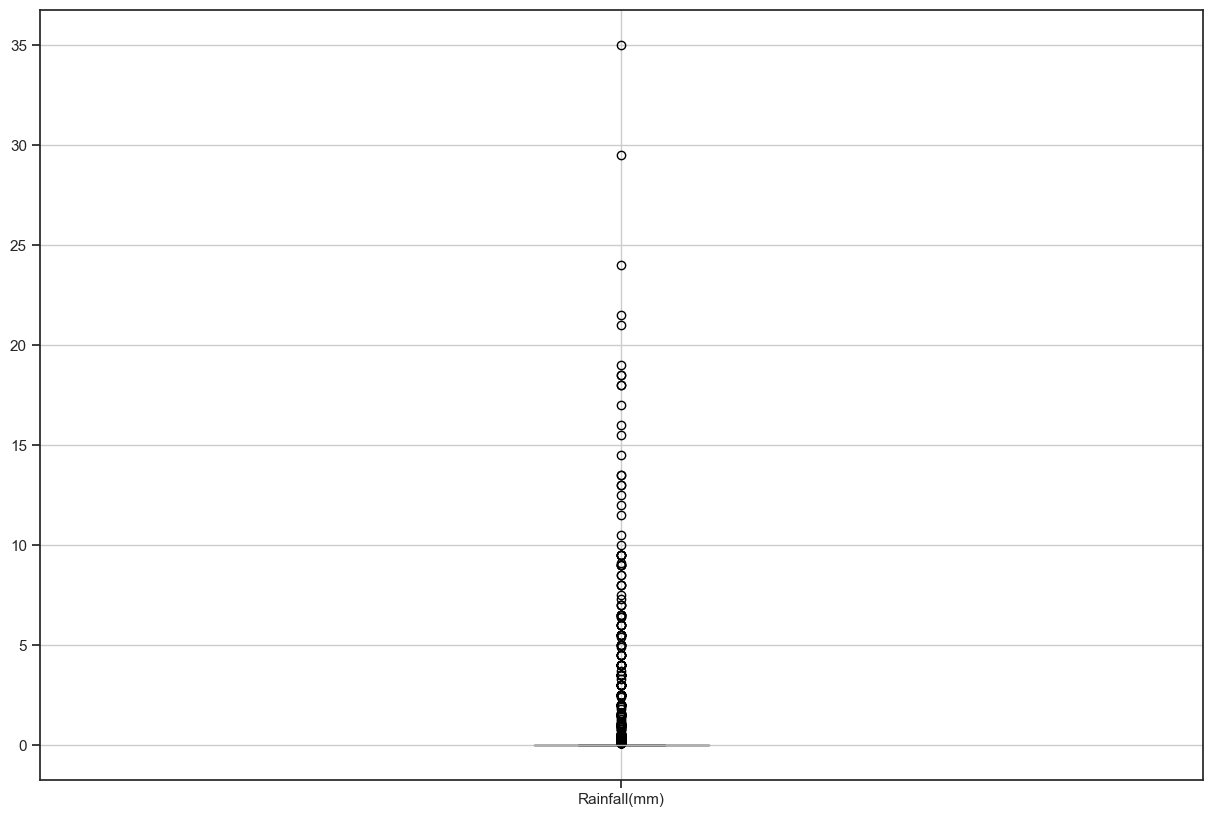

In [30]:
plt.figure(figsize= (15,10))
df.boxplot(column= "Rainfall(mm)")

In [31]:
outliers, upper, lower = detect_outliers_IQR(df['Rainfall(mm)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 527
max outlier value: 35.0
min of outliers: 0.1
Percentage of outliers: 6.022857142857143


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [32]:
extreme_Rainfall = df[(df['Rainfall(mm)'] > outliers.min()) & (df['Rainfall(mm)'] < outliers.max())]
extreme_Rainfall.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,OperationDay
51,4,2017-03-12 00:00:00,36.562500,117,8,3.4,71,1.6,1011,-1.3,0.00,0.5,0.0,Winter,Yes
54,7,2017-03-12 00:00:00,3.250000,13,5,3.4,86,2.5,278,1.2,0.00,1.0,0.0,Winter,Yes
57,10,2017-03-12 00:00:00,37.073171,152,9,3.5,91,1.8,231,2.1,0.02,2.5,0.0,Winter,Yes
123,4,2017-06-12 00:00:00,19.500000,78,5,-3.2,78,0.0,1808,-6.4,0.00,0.2,0.4,Winter,Yes
138,19,2017-06-12 00:00:00,51.000000,204,5,1.7,90,1.0,66,0.2,0.00,0.3,0.3,Winter,Yes


### ---------> OBSERVATION
****
Based on the result, I see the outlier of `Rainfall` is often located in the extreme condition of environment so I want to explore more them in the next step.

> **`Snowfall(cm)` column**

<AxesSubplot:>

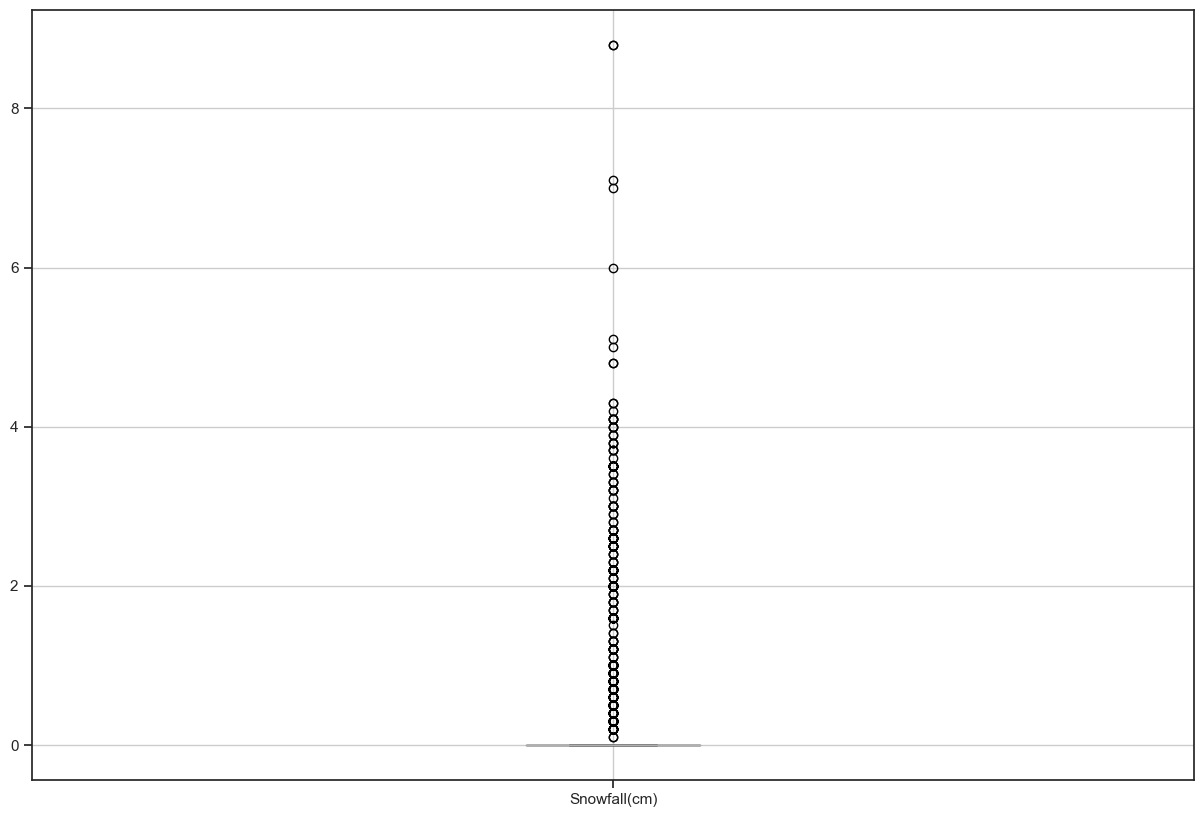

In [33]:
plt.figure(figsize= (15,10))
df.boxplot(column= "Snowfall(cm)")

In [34]:
outliers, upper, lower = detect_outliers_IQR(df['Snowfall(cm)'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 438
max outlier value: 8.8
min of outliers: 0.1
Percentage of outliers: 5.005714285714285


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [35]:
extreme_Snowfall = df[(df['Snowfall(cm)'] > outliers.min()) & (df['Snowfall(cm)'] < outliers.max())]
extreme_Snowfall.head()

,StationNumber,Date,CasualUser,RegisteredUser,Newregistereduser,Temperature(°C),Humidity(%),Windspeed(m/s),Visibility(10m),Dewpointtemperature(°C),SolarRadiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,OperationDay
121,2,2017-06-12 00:00:00,41.142857,144,4,-3.0,79,0.0,293,-6.1,0.0,0.0,0.3,Winter,Yes
122,3,2017-06-12 00:00:00,24.893617,117,8,-3.0,79,0.0,1862,-6.1,0.0,0.0,0.4,Winter,Yes
123,4,2017-06-12 00:00:00,19.500000,78,5,-3.2,78,0.0,1808,-6.4,0.0,0.2,0.4,Winter,Yes
124,5,2017-06-12 00:00:00,12.340426,58,1,-3.4,75,0.0,1982,-7.2,0.0,0.0,0.4,Winter,Yes
125,6,2017-06-12 00:00:00,27.187500,87,4,-3.6,76,0.0,1934,-7.2,0.0,0.0,0.4,Winter,Yes


### ---------> OBSERVATION
****
Based on the result, I see the outlier of `Snowfall` is often located in the extreme condition of environment so I want to explore more them in the next step.

<a id="3.2"></a>
# 3.2 Correlation between columns
*****

/var/folders/2r/8n96nprj6xj63r26db8sxy640000gn/T/ipykernel_72675/2733726890.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


Text(0.5, 1.03, 'Correlations Among Features')

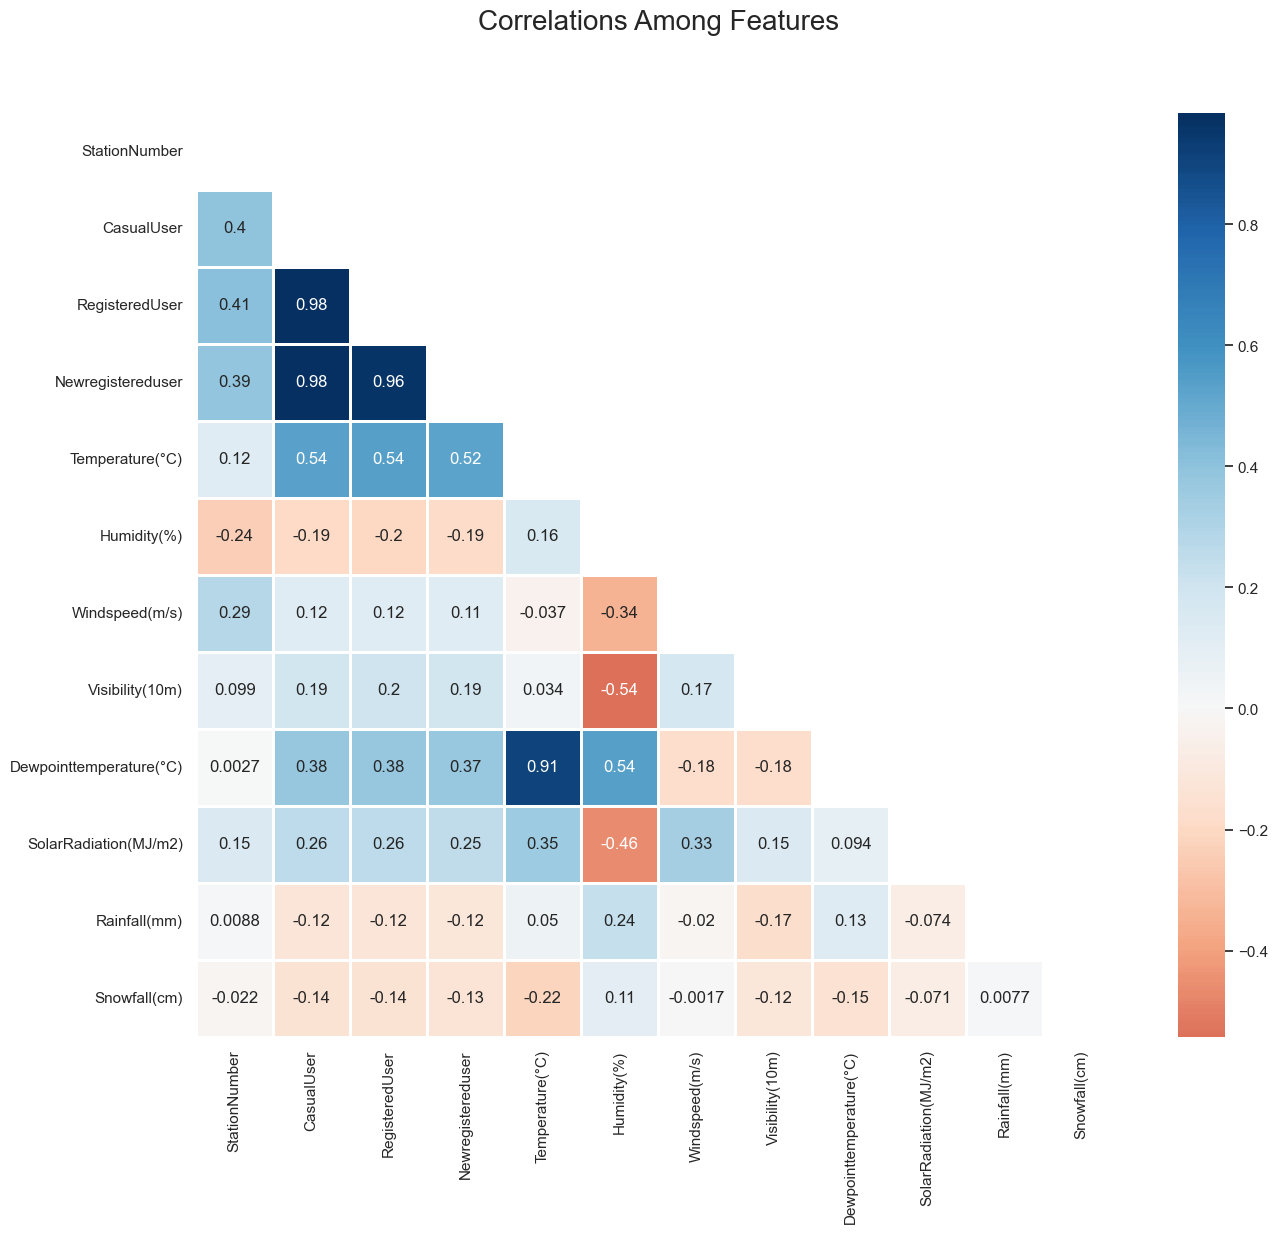

In [36]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

### ---------> OBSERVATION
****
According to the heatmap, there are multicorrelational relationship. Since then, I want to test the correlation between them.

## Distrubution of features
**** 
Before checking all the multicorrelational relationship I want to check the Distrution in order to have the most appropriate test type for each element

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1500x1000 with 0 Axes>

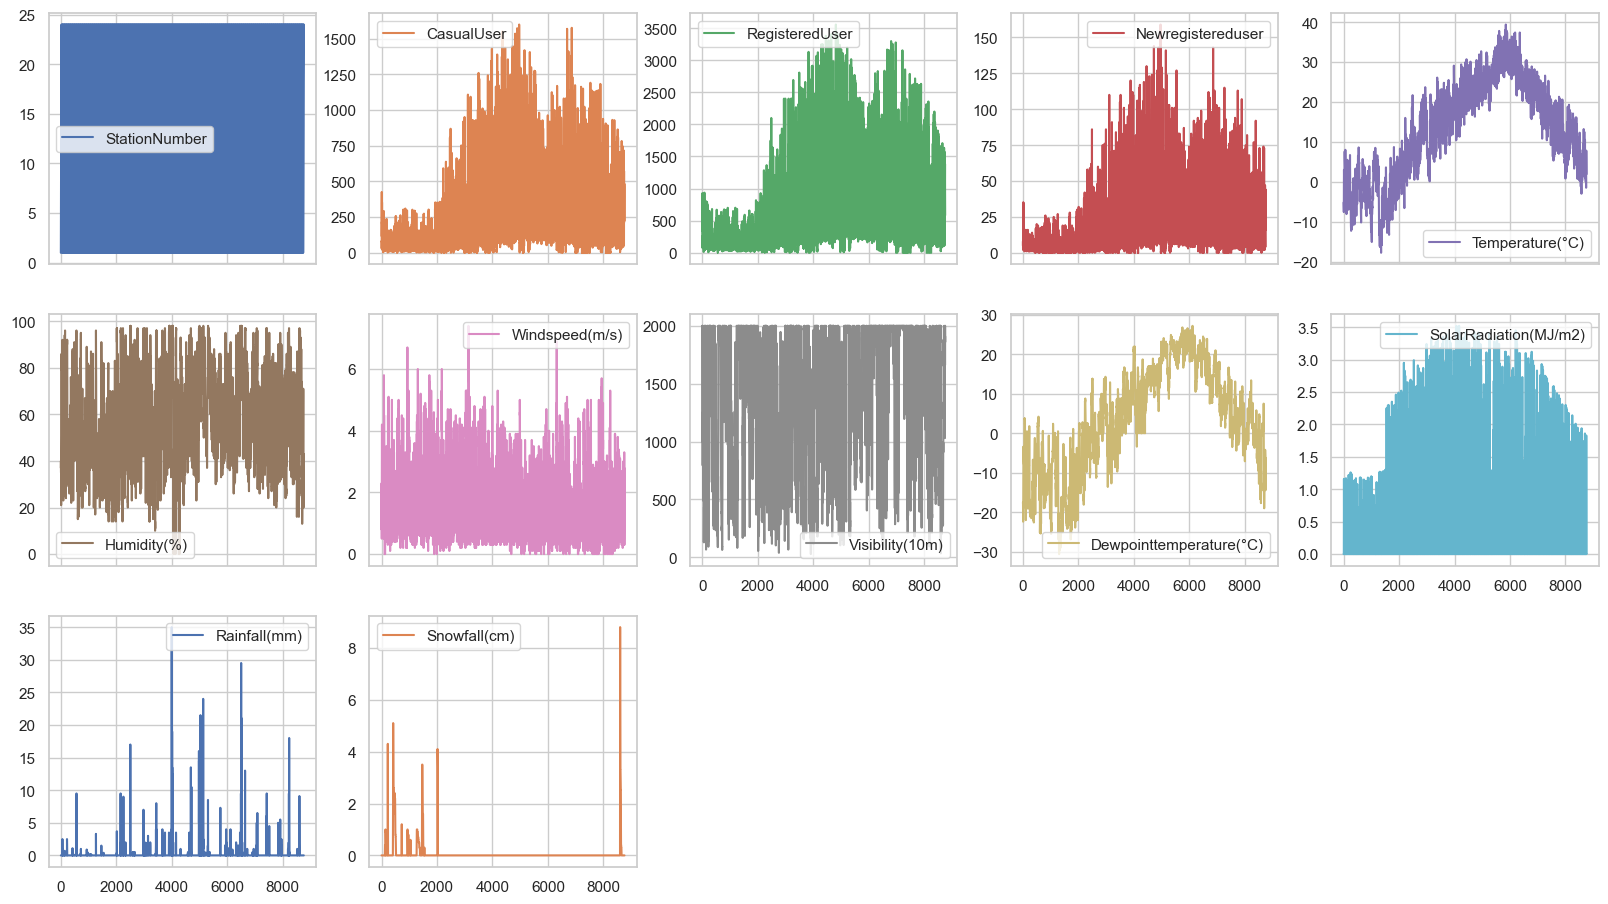

In [37]:
plt.figure(figsize= (15,10))
df.plot(subplots=True, layout=(4,5))

### ---------> OBSERVATION
****
Since there are no normal distribution so we cannot use the Pearson Correlation HeatMap. Since then, we use the T-test method to test [[3](#Link3)]. 

<a id="3.2.1"></a>
## 3.2.1 Correlation between User Feature
****

## RQ1. What is the correlation between `CasualUser` and `RegisteredUser`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `CasualUser` and `RegisteredUser` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `CasualUser` and `RegisteredUser` are not correlated.

**Significance level** = 0.05

In [38]:
pearsonr(df['RegisteredUser'], df['CasualUser'])

PearsonRResult(statistic=0.9844942434447803, pvalue=0.0)

### ---------> OBSERVATION
****
The column `RegisteredUser` and `CasualUser` are correlated because: 
> - The T-test correlation score is high: 0.98
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ2. What is the correlation between `Newregistereduser` and `RegisteredUser`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `Newregistereduser` and `RegisteredUser` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `Newregistereduser` and `RegisteredUser` are not correlated.

**Significance level** = 0.05

In [39]:
pearsonr(df['RegisteredUser'], df['Newregistereduser'])

PearsonRResult(statistic=0.9638312061918998, pvalue=0.0)

### ---------> OBSERVATION
****
The column `Newregistereduser` and `RegisteredUser` are correlated because: 
> - The T-test correlation score is high: 0.96
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ3. What is the correlation between `Newregistereduser` and `CasualUser`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `Newregistereduser` and `CasualUser` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `Newregistereduser` and `CasualUser` are not correlated.

**Significance level** = 0.05

In [40]:
pearsonr(df['CasualUser'], df['Newregistereduser'])

PearsonRResult(statistic=0.9794761680906857, pvalue=0.0)

### ---------> OBSERVATION
****
The column `Newregistereduser` and `CasualUser` are correlated because: 
> - The T-test correlation score is high: 0.97
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

<a id="3.2.2"></a>
## 3.2.2 Correlation of the Temperature Feature

## RQ4. What is the correlation between `Dewpointtemperature` and `Temperature`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `Dewpointtemperature` and `Temperature` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `Dewpointtemperature` and `Temperature` are not correlated.

**Significance level** = 0.05

In [41]:
pearsonr(df['Dewpointtemperature(°C)'], df['Temperature(°C)'])

PearsonRResult(statistic=0.9127976489794499, pvalue=0.0)

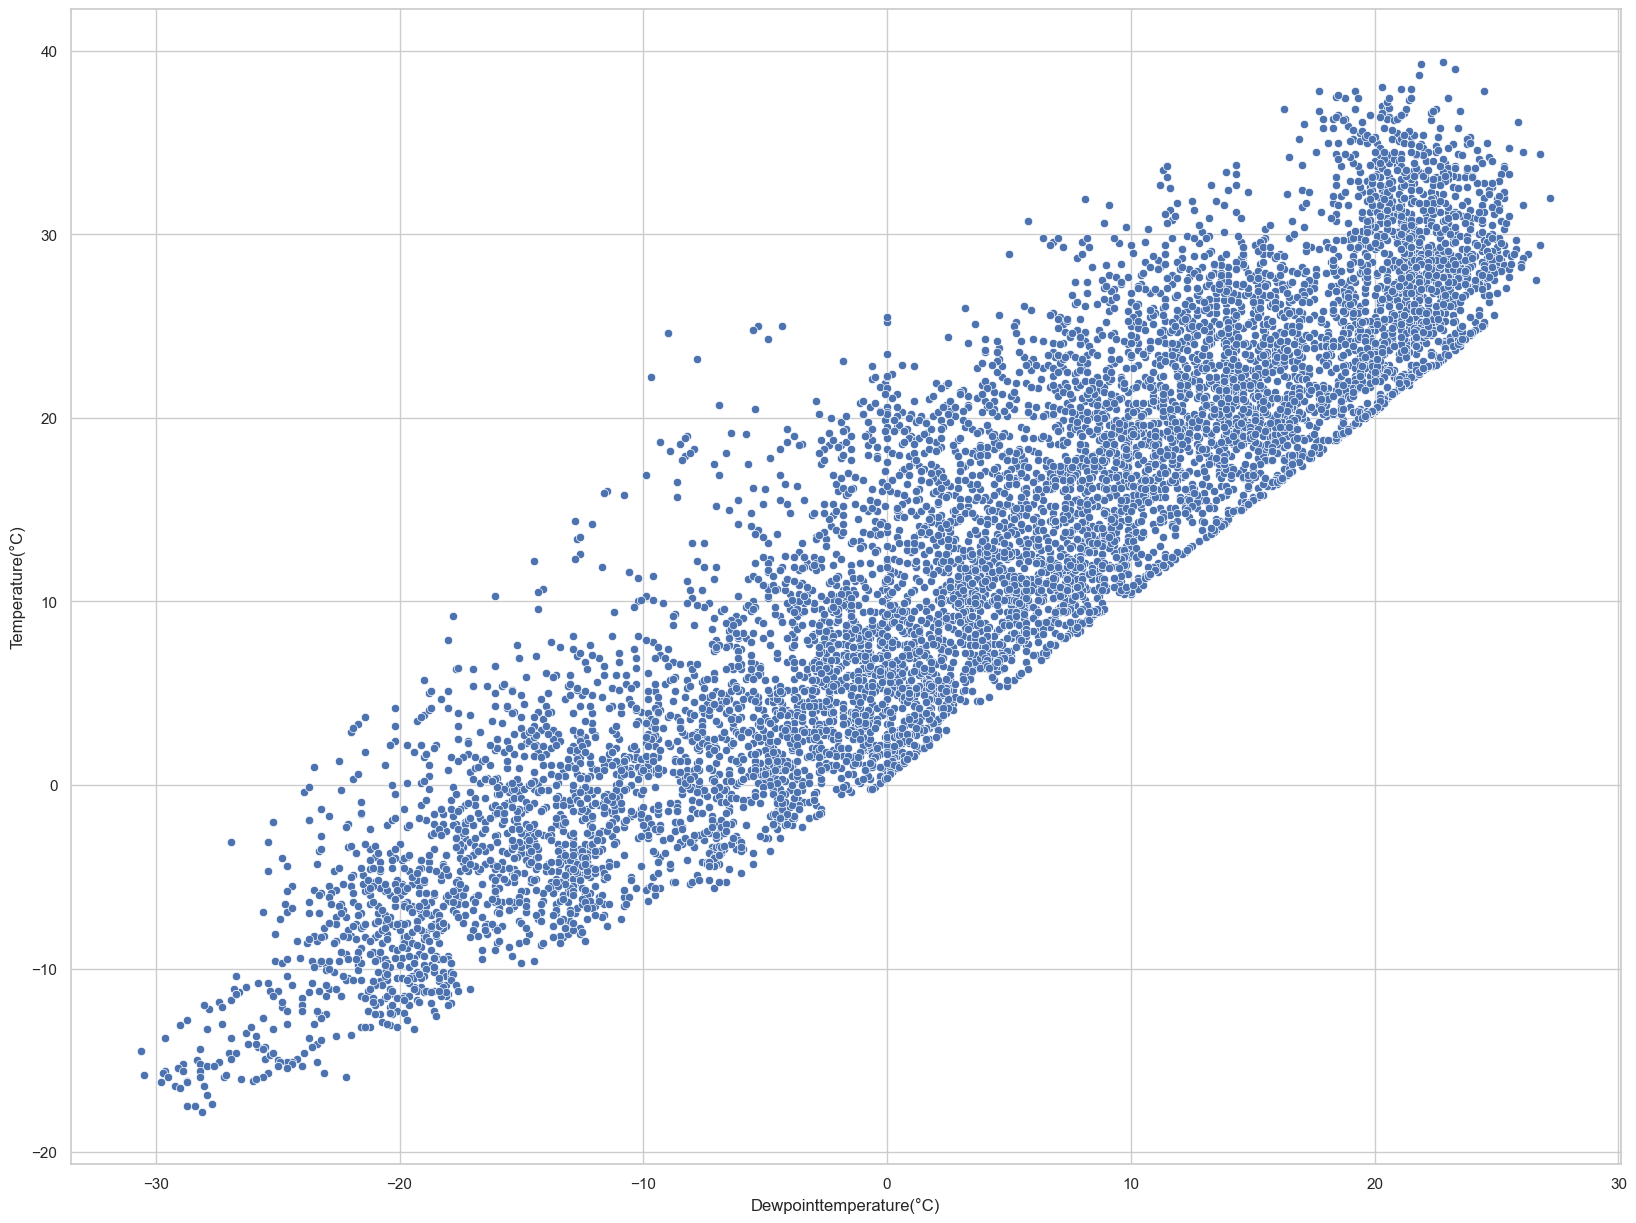

In [42]:
sns.scatterplot(x="Dewpointtemperature(°C)", y="Temperature(°C)", data=df);

### ---------> OBSERVATION
****
The column `Temperature` and `Dewpointtemperature` are positively correlated because: 
> - The T-test correlation score is positively high: 0.97
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.
> - Base on the scatter plot, value for `Dewpointtemperature` increases, so does the value for `Temperature` at a constant rate

## RQ5. What is the correlation between `Humidity(%)` and `Temperature(°C)`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `Humidity(%)` and `Temperature(°C)` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `Humidity(%)` and `Temperature(°C)` are not correlated.

**Significance level** = 0.05

In [43]:
pearsonr(df['Humidity(%)'], df['Temperature(°C)'])

PearsonRResult(statistic=0.1602713855244127, pvalue=1.957237144286855e-51)

### ---------> OBSERVATION
****
The column `Humidity` and `Temperature` are not correlated because: 
> - The T-test correlation score is low: 0.16
> - P-values is higher than the ***Significant level*** so we ***can reject the null hypothesis***.

## RQ6. What is the correlation between `Humidity(%)` and `Dewpointtemperature(°C)`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `Humidity(%)` and `Dewpointtemperature(°C)` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `Humidity(%)` and `Dewpointtemperature(°C)` are not correlated.

**Significance level** = 0.05

In [44]:
pearsonr(df['Humidity(%)'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.5376597766476869, pvalue=0.0)

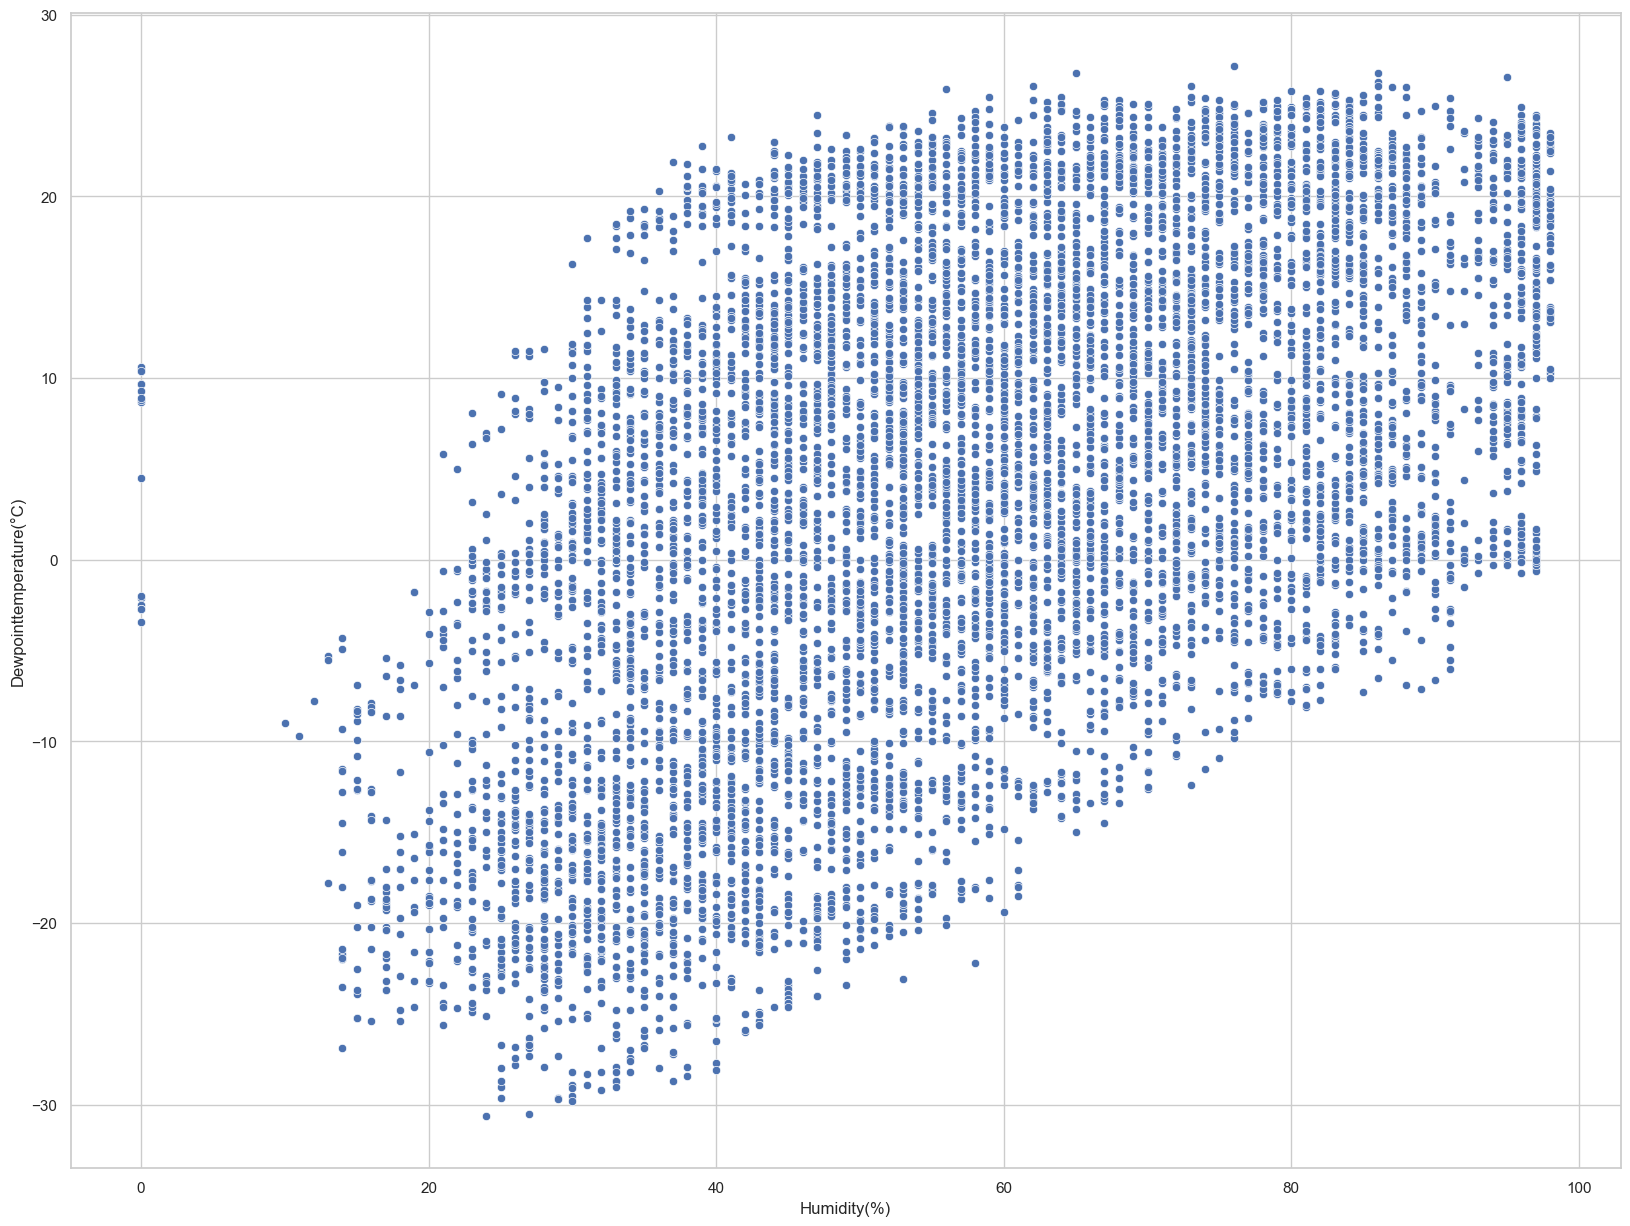

In [45]:
sns.scatterplot(x="Humidity(%)", y="Dewpointtemperature(°C)", data=df);

### ---------> OBSERVATION
****
The column `Humidity` and `Dewpointtemperature` have positively weak correlation: 
> - The T-test correlation score is: 0.53
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.
> - Base on the scatter plot, value for `Humidity` increases, so does the value for `Dewpointtemperature` at a constant rate

## RQ7. What is the correlation between `SolarRadiation(MJ/m2)` and `Temperature(°C)`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `SolarRadiation(MJ/m2)` and `Temperature(°C)` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `SolarRadiation(MJ/m2)` and `Temperature(°C)` are not correlated.

**Significance level** = 0.05

In [46]:
pearsonr(df['SolarRadiation(MJ/m2)'], df['Temperature(°C)'])

PearsonRResult(statistic=0.35313989325401723, pvalue=2.2918717788565843e-255)

### ---------> OBSERVATION
****
The column `SolarRadiation(MJ/m2)` and `Temperature` are not correlated because: 
> - The T-test correlation score is low: 0.35
> - P-values is higher than the ***Significant level*** so we ***can reject the null hypothesis***.

## RQ8. What is the correlation between `SolarRadiation(MJ/m2)` and `Humidity(%)`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `SolarRadiation(MJ/m2)` and `Humidity(%)` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `SolarRadiation(MJ/m2)` and `Humidity(%)` are not correlated.

**Significance level** = 0.05

In [47]:
pearsonr(df['SolarRadiation(MJ/m2)'], df['Humidity(%)'])

PearsonRResult(statistic=-0.46185122380349597, pvalue=0.0)

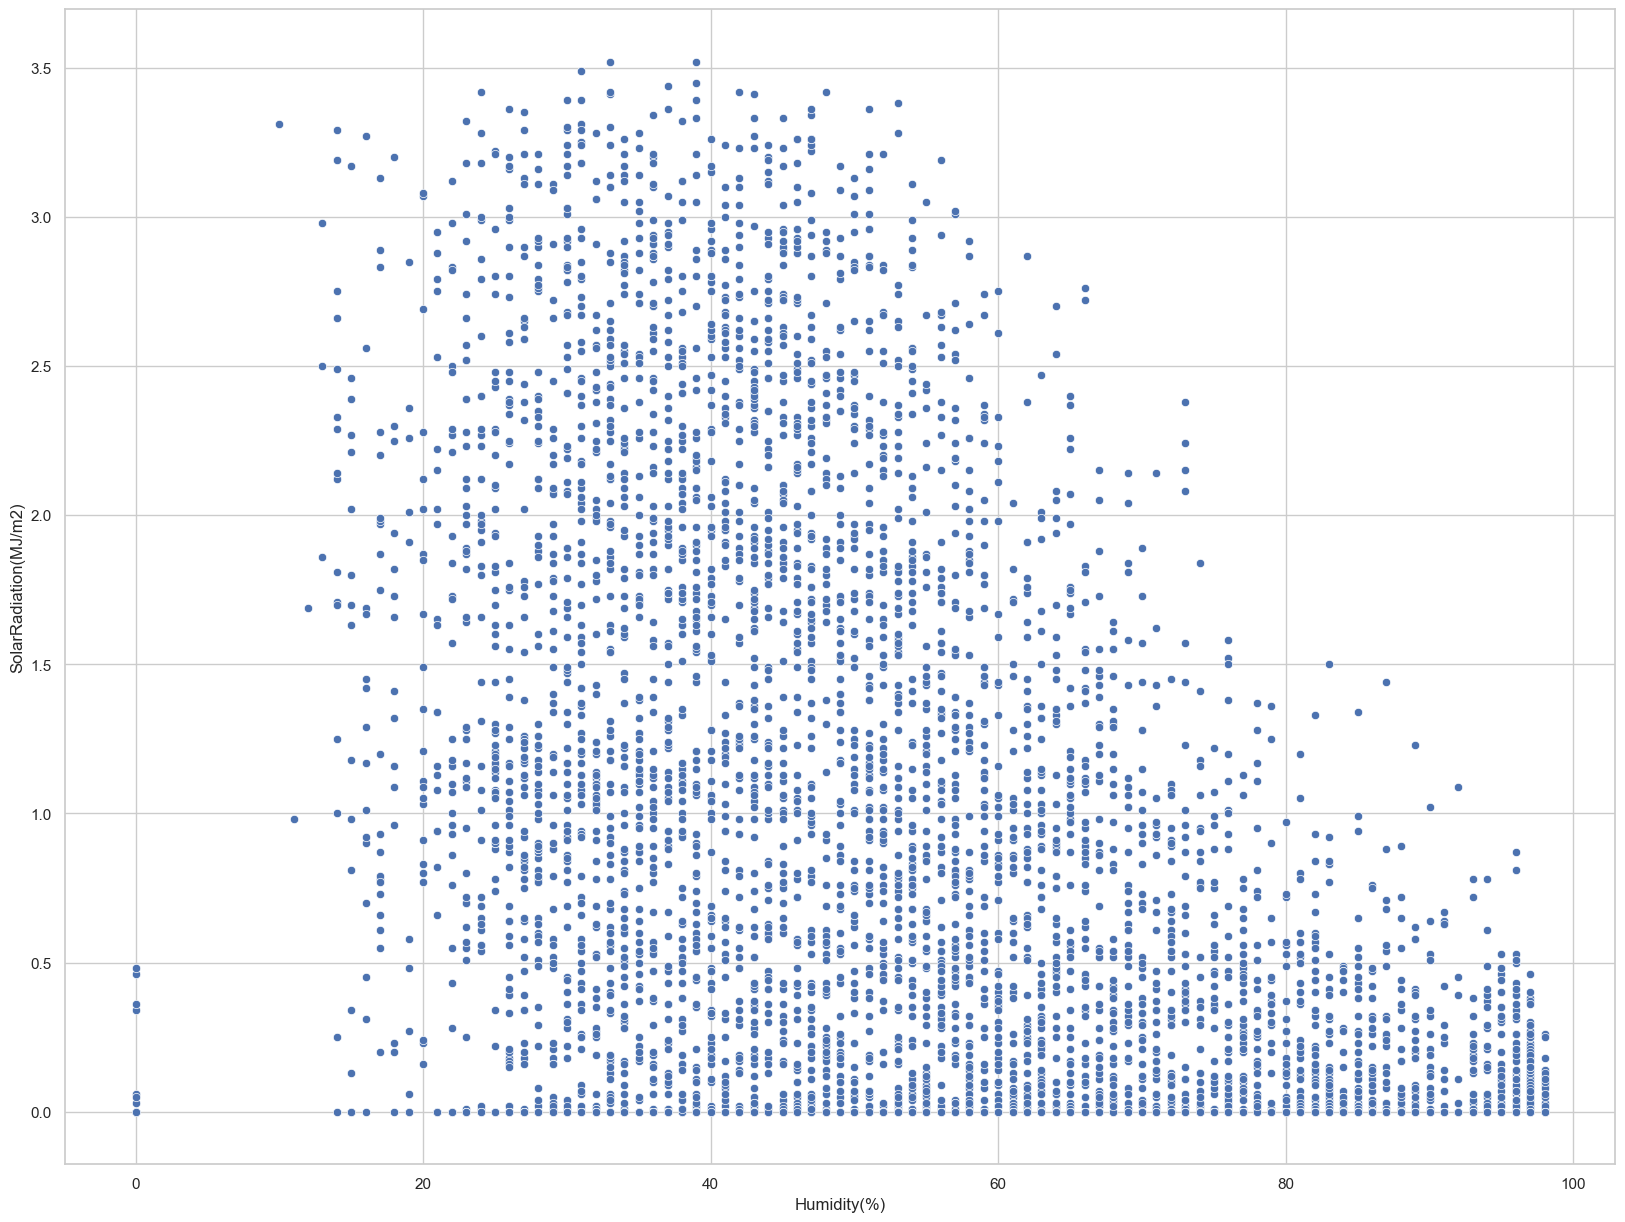

In [48]:
sns.scatterplot(x="Humidity(%)", y="SolarRadiation(MJ/m2)", data=df);

### ---------> OBSERVATION
****
The column `Humidity` and `SolarRadiation` have negatively weak correlation: 
> - The T-test correlation score is: -0.46
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.
> - Base on the scatter plot, vthe value for `Humidity` increases, the value for `SolarRadiation` decreases at a constant rate.

## RQ9. What is the correlation between `SolarRadiation(MJ/m2)` and `Dewpointtemperature(°C)`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `SolarRadiation(MJ/m2)` and `Dewpointtemperature(°C)` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `SolarRadiation(MJ/m2)` and `Dewpointtemperature(°C)` are not correlated.

**Significance level** = 0.05

In [49]:
pearsonr(df['SolarRadiation(MJ/m2)'], df['Dewpointtemperature(°C)'])

PearsonRResult(statistic=0.0939686082099711, pvalue=1.2717427916406044e-18)

### ---------> OBSERVATION
****
The column `SolarRadiation` and `Dewpointtemperature` are not correlated because: 
> - The T-test correlation score is low: 0.09
> - P-values is higher than the ***Significant level*** so we ***can reject the null hypothesis***.

<a id="3.3"></a>
# 3.3 Analyze Operation Day condition:
*****

## Check the `OperationDay` Content

In [50]:
df['OperationDay'].value_counts()

Yes    8455
No      295
Name: OperationDay, dtype: int64

### ---------> OBSERVATION
****
First of all, the classes in this target variable is unbalanced so that by exploring this dataset, we can get some more information for the station to be opened, more than the information that the station is closed.

## Check the correlation between the `OperationDay` and other columns
****
Since the `OperationDay` is the dichotomous values I want to use Chi-Sq Test to test the correlation between them

In [53]:
df.loc[df['OperationDay'].isin(['Yes']), 'OperationDay'] = '1'
df.loc[df['OperationDay'].isin(['No']), 'OperationDay'] = '0'
df[['OperationDay']] = df[['OperationDay']].apply(pd.to_numeric)

In [54]:
## get the most important variables. 
corr = df.corr()**2
corr.OperationDay.sort_values(ascending=False)

OperationDay               1.000000
RegisteredUser             0.041679
CasualUser                 0.037381
Newregistereduser          0.035877
Dewpointtemperature(°C)    0.002776
Temperature(°C)            0.002497
Snowfall(cm)               0.001016
Visibility(10m)            0.000672
Humidity(%)                0.000437
SolarRadiation(MJ/m2)      0.000057
StationNumber              0.000030
Windspeed(m/s)             0.000026
Rainfall(mm)               0.000004
Name: OperationDay, dtype: float64

### ------------> OBSERVATION
***
In our data, the `OperationDay` seem to have low correlation with others columns.

In [ ]:
stop

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [World: Highest Temperature](https://wmo.asu.edu/content/world-highest-temperature)

<a id="Link2"></a>
- [2] [The Most Humid Cities In The World, Mapped](https://digg.com/nature/link/most-humid-cities-in-the-world-mapped-ocnm3EUU3n#:~:text=They%20scanned%20over%2018%2C000%20cities,Here's%20what%20they%20found.&text=The%20world's%20most%20humid%20city,neighboring%20countries%20Bangladesh%20and%20Myanmar.)

<a id="Link3"></a>
- [3] [Who is afraid of non-normal data? Choosing between parametric and non-parametric tests](https://eje.bioscientifica.com/view/journals/eje/182/2/EJE-19-0922.xml#:~:text=The%20t%2Dtest%20is%20not,distributions%20of%20the%20outcome%20variable.)